In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from env import host, user, password

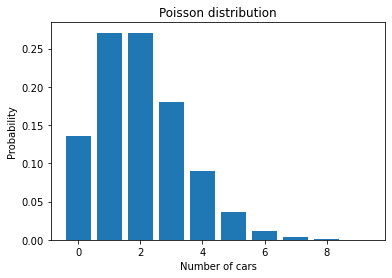

In [2]:
#1. A bank found that the average number of cars waiting during the noon hour at a drive-up window 
#follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer 
#these questions concerning the probability of cars waiting at the drive-up window.

λ = 2
x = np.arange(0,10)
y = stats.poisson(λ).pmf(x)

plt.bar(x,y)
plt.title('Poisson distribution')
plt.xlabel('Number of cars')
plt.ylabel('Probability');


In [3]:
# What is the probability that no cars drive up in the noon hour?
print("Probability (in %) that no cars drive up in the noon hours:", round(stats.poisson(λ).pmf(0) * 100))

Probability (in %) that no cars drive up in the noon hours: 14


In [4]:
# What is the probability that 3 or more cars come through the drive through?
print("Probability (in %) that 3 or more cars come through in the noon hour:", round(stats.poisson(λ).sf(2) * 100))

Probability (in %) that 3 or more cars come through in the noon hour: 32


In [5]:
# How likely is it that the drive through gets at least 1 car?
print("Probability (in %) that 1 or more cars come through in the noon hour:", round(stats.poisson(λ).sf(0) * 100))

Probability (in %) that 1 or more cars come through in the noon hour: 86


In [6]:
#2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. 
# Calculate the following:

# What grade point average is required to be in the top 5% of the graduating class?

print("GPA required to be in top 5%:", round(stats.norm(3.0, 0.3).isf(0.05), 2))

GPA required to be in top 5%: 3.49


In [7]:
# What GPA constitutes the bottom 15% of the class?
print("GPA max for bottom 15% of the class:", round(stats.norm(3.0, 0.3).ppf(0.15), 2))

GPA max for bottom 15% of the class: 2.69


In [8]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for 
# this scholarship?
print("Eccentric Alumnus Scholarship GPA Range:", stats.norm(3, 0.3).ppf([0.2, 0.3]).round(decimals=2))

Eccentric Alumnus Scholarship GPA Range: [2.75 2.84]


In [9]:
# If I have a GPA of 3.5, what percentile am I in?
student_gpa = 3.5
print("GPA of", student_gpa, "is in the top", round(stats.norm(3, 0.3).cdf(student_gpa) * 100), "percent of the class.")

GPA of 3.5 is in the top 95 percent of the class.


In [10]:
# 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors 
# and 97 click-throughs. How likely is it that this many people or more click through?

click_through_rate = 0.02
visitors = 4326
click_throughs = 97

print("Percent liklihood of", click_throughs, "click-throughs with a click-through rate of", 
      round(click_through_rate * 100), "is:", round(stats.binom(visitors, click_through_rate).sf(click_throughs - 1) * 100))
# Don't forget to subtract or account for the inclusivity

Percent liklihood of 97 click-throughs with a click-through rate of 2 is: 14


In [11]:
# 4. You are working on some statistics homework consisting of 100 questions where all of the answers 
# are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities 
# as the answer to each question.
#    - What is the probability that at least one of your first 60 answers is correct?

questions_tried = 60
guess_probability = .01
print("Percent liklihood of correct guess after", questions_tried, "questions:",
      round(stats.binom(questions_tried, guess_probability).sf(0) * 100, 2))

Percent liklihood of correct guess after 60 questions: 45.28


In [12]:
# 5. The codeup staff tends to get upset when the student break area is not cleaned up. 
# Suppose that there's a 3% chance that any one student cleans the break area when they visit it, 
# and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
# How likely is it that the break area gets cleaned up each day? 

chance_of_cleaning = .03
visits_per_day = 59
print("Percent liklihood of cleaning for a single day:", round(stats.binom(visits_per_day, chance_of_cleaning).sf(0)* 100, 2))

Percent liklihood of cleaning for a single day: 83.42


In [13]:
# How likely is it that it goes two days without getting cleaned up? 
print("Percent liklihood of no cleaning for two days:", round(stats.binom(visits_per_day * 2, chance_of_cleaning).pmf(0) * 100, 2))

Percent liklihood of no cleaning for two days: 2.75


In [14]:
# All week?
print("Percent liklihood of no cleaning all week:", round(stats.binom(visits_per_day * 5, chance_of_cleaning).pmf(0) * 100, 2))

Percent liklihood of no cleaning all week: 0.01


In [15]:
# You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 
# After several weeks of careful observation, you notice that the average number of people in line 
# when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 
# If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is 
# the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? 
# Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

mean_wait = 30
std_dev = 6
max_time = 60 - 10 - 15 - 2
# Forgot to account for your own ordering time, added the extra '- 2' for that

print("Percent liklihood of having 15 minutes to eat:", round(stats.norm(mean_wait, std_dev).cdf(max_time) * 100, 2))

Percent liklihood of having 15 minutes to eat: 69.15


In [26]:
# 7. Connect to the employees database and find the average salary of current employees, along with the 
# standard deviation. For the following questions, calculate the answer based on modeling the employees 
# salaries with a normal distribution defined by the calculated mean and standard deviation then compare 
# this answer to the actual values present in the salaries dataset.

def get_db_url(db_name):
    from env import user, host, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

url = get_db_url('employees')

salaries_df = pd.read_sql('SELECT * FROM salaries WHERE to_date > NOW()', url)
mean_salary = salaries_df.salary.mean()
std_dev = salaries_df.salary.std()

In [29]:
# a. What percent of employees earn less than 60,000?
print("Percent of employees earning less than 60k:", round(stats.norm(mean_salary, std_dev).cdf(60000) * 100, 2))

Percent of employees earning less than 60k: 24.39


In [31]:
# b. What percent of employees earn more than 95,000
print("Percent of employees earning more than 95k:", round(stats.norm(mean_salary, std_dev).sf(95000) * 100, 2))

Percent of employees earning more than 95k: 9.21


In [34]:
stats.norm(mean_salary, std_dev).cdf([65000, 80000])

array([0.34270292, 0.67776349])

In [44]:
# c. What percent of employees earn between 65,000 and 80,000?
print("Percent of employees earning betweekn 65 & 80k:", round(float(np.diff(stats.norm(mean_salary, std_dev).cdf([65000, 80000]))*100),2))

Percent of employees earning betweekn 65 & 80k: 33.51


In [46]:
# d. What do the top 5% of employees make?
print("Top 5% of employees make at least:", round(stats.norm(mean_salary, std_dev).isf(0.05), 2))

Top 5% of employees make at least: 100484.64
